# Problem set 5

## Lezhong Shen

In [1]:
from linearmodels import IV2SLS
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.iv import IV2SLS

import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


# 1. To standardize or not

Please download the data set speed1.csv from the Absalon course page. This is a simulated data set giving the height in meters and weight in grams of different runners, as well as their average running speed over 5 km.

**a) Open speed1.csv. Use Knearest neighbor to conduct a supervised
learning analysis that predicts running speed from height and weight
(go through all our usual analysis). Do not apply any standardization
or other preprocessing to the features.**

In [3]:
df = pd.read_csv('speed1.csv')
df

,height,weight,speed
0,1.85,70822,8.47
1,1.87,67067,7.26
2,1.93,82173,10.25
3,1.87,69363,7.08
4,1.90,72067,8.87
...,...,...,...
25116,1.90,71444,7.77
25117,1.73,67113,8.62
25118,1.79,75663,7.49
25119,1.81,67183,8.19


In [4]:
X = df.drop('speed',axis=1)
y = df['speed']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

knn = KNeighborsRegressor() 
k_dict = {'n_neighbors' : list(range(1,100))}
model = GridSearchCV(knn, k_dict,scoring='neg_mean_squared_error',n_jobs=-1, cv=5)
model_fit2 = model.fit(x_train,y_train)

In [5]:
best_model_1 = model_fit2.best_estimator_
y_pred = best_model_1.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mse
# here use this method or use 
# neigh = KNeighborsRegressor(n_neighbors=99) reg = neigh.fit(x1, y1) knn = neigh.kneighbors(x)... to calculate the 
# mse will have the same result, as the data is the same(no other processing)

0.5786147100920254

**b) What is the mean and standard deviation of height and weight? Comment on the similarity of the scaling of these variables**

In [7]:
import statistics
print("mean height ", df.height.mean())
print("mean weight", df.weight.mean())


print(statistics.stdev(data = df.weight))
print(statistics.stdev(data = df.height))

mean height  1.8304717168902351
mean weight 72304.6035189682
6947.031636754223
0.06988027470458766


In [8]:
df.describe()

,height,weight,speed
count,25121.000000,25121.000000,25121.000000
mean,1.830472,72304.603519,7.885739
std,0.069880,6947.031637,0.784683
min,1.580000,49700.000000,3.960000
25%,1.780000,67575.000000,7.370000
50%,1.830000,72296.000000,7.890000
75%,1.880000,76924.000000,8.410000
max,2.140000,100082.000000,11.250000


From the result we can see that the scaling of weight is very different and could bias results later on.

**c) Repeat your analysis from a) but now include a preprocessing step that standardizes the features. Be careful about data leakage when you standardize. Compare the model performance here to the one from a). (Hint: Sklearn has a useful function called StandardScaler(). However, think about when to use this function to avoid data leakage. Have a look at sklearn.pipeline.Pipeline for how to best build the standardization into your analysis.)**

In [9]:
train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression Pipeline
pipe = Pipeline([('scl', StandardScaler()),
                ('reg', KNeighborsRegressor())])

pipe.fit(x_train, y_train)

#create a dictionary of all values we want to test for n_neighbors
param_grid = {"reg__n_neighbors": np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',n_jobs=-1, cv=5)

#fit model to data'
knn_gscv.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('reg', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'reg__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_mean_squared_error')

In [10]:
# Getting the predictions and mse
# here needs to use knn_gscv.best_estimator_ to predict and can't use 
# neigh = KNeighborsRegressor(n_neighbors=the best k) reg = neigh.fit(x1, y1)... to predict(不能单独把k拿出来回归）,
# as the best_estimator is processed with pipeline and is different from orignial data.

best_model = knn_gscv.best_estimator_
y_pred2 = best_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred2)
mse

0.3684316976050514

Based on calculating MSE, the standardization does seem to create a model with better performance.

# 2. Predicting Bankruptcy

**a) Open bank1.csv. Do a supervised learning analysis (classification) to
predict whether firms go bankrupt based on all the financial variables
in the data (going through all the relevant steps). Use logistic regression in the classification exercise. When assessing performance on your
test data compute the error rate, show the confusion matrix, plot the
ROC-curve and compute AUC.
(Hint: Sklearn has many useful function to assess performance.)**

In [11]:
df2 = pd.read_csv("bank1.csv")
df2

,bankrupt,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,...,operatingfundstoliability,workingcapitalequity,totalincometotalexpense,cashflowtosales,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability
0,1,0.424389,0.601457,0.808809,0.458143,0.147950,0.311664,0.022102,0.688979,0.363725,...,0.334015,0.721275,0.002022,0.671568,0.126550,0.520382,0,0.601453,0.026601,0.016469
1,1,0.538214,0.610235,0.809301,0.461867,0.182251,0.318137,0.022080,0.689702,0.376709,...,0.341106,0.731975,0.002226,0.671570,0.120916,0.567101,0,0.610236,0.264577,0.020794
2,1,0.499019,0.601364,0.808388,0.458521,0.177911,0.307102,0.022760,0.689470,0.368913,...,0.336732,0.742729,0.002060,0.671571,0.117922,0.538490,0,0.601449,0.026555,0.016474
3,1,0.451265,0.583541,0.808966,0.465705,0.154187,0.321674,0.022046,0.689110,0.384077,...,0.348716,0.729825,0.001831,0.671519,0.120761,0.604105,0,0.583538,0.026697,0.023982
4,1,0.538432,0.598784,0.809304,0.462746,0.167502,0.319163,0.022096,0.689697,0.379690,...,0.344639,0.732000,0.002224,0.671563,0.110933,0.578469,0,0.598781,0.024752,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.539468,0.604462,0.809331,0.463734,0.175045,0.320966,0.022374,0.689778,0.380155,...,0.346224,0.736716,0.002266,0.671570,0.112622,0.587178,0,0.604455,0.027064,0.029890
6815,0,0.538269,0.598308,0.809327,0.461978,0.181324,0.318278,0.022159,0.689734,0.377389,...,0.342166,0.734584,0.002288,0.671572,0.112329,0.569498,0,0.598306,0.027009,0.038284
6816,0,0.533744,0.610213,0.809317,0.472189,0.269521,0.324857,0.022068,0.689202,0.379392,...,0.358847,0.737432,0.002239,0.671564,0.110933,0.589341,0,0.610441,0.026791,0.097649
6817,0,0.559911,0.607850,0.809399,0.476123,0.213392,0.346573,0.022350,0.696113,0.401028,...,0.380251,0.736713,0.002395,0.671606,0.110957,0.678338,0,0.607846,0.026822,0.044009


In [12]:
df2.describe()

,bankrupt,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,...,operatingfundstoliability,workingcapitalequity,totalincometotalexpense,cashflowtosales,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.558625,0.607929,0.809084,0.467431,0.190633,0.323482,0.022408,0.689150,0.379677,...,0.353828,0.735817,0.002549,0.671531,0.115645,0.593415,0.001173,0.607946,0.027541,0.047578
std,0.176710,0.065620,0.016916,0.013601,0.017036,0.033474,0.017611,0.012079,0.013910,0.020737,...,0.035147,0.011678,0.012093,0.009341,0.019529,0.058561,0.034234,0.016934,0.015668,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.535543,0.600434,0.809312,0.461558,0.173613,0.317748,0.022065,0.689270,0.374749,...,0.341023,0.733612,0.002236,0.671565,0.110933,0.565987,0.000000,0.600443,0.026791,0.024477
50%,0.000000,0.559802,0.605976,0.809375,0.465080,0.184400,0.322487,0.022102,0.689439,0.380426,...,0.348597,0.736013,0.002336,0.671574,0.112340,0.593266,0.000000,0.605998,0.026808,0.033798
75%,0.000000,0.589157,0.613842,0.809469,0.471004,0.199570,0.328623,0.022153,0.689647,0.386731,...,0.360915,0.738560,0.002492,0.671587,0.117106,0.624769,0.000000,0.613913,0.026913,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X1 = df2.drop('bankrupt',axis=1)
y1 = df2['bankrupt']

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [14]:
#here i use the elastic net

elastic_log = LogisticRegression(penalty = 'elasticnet', max_iter=10000, solver = 'saga')

l1_ratio_c_dict = {'l1_ratio' : [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 'C' : [0.5, 1, 10]}

gridsearch3 = GridSearchCV(elastic_log,l1_ratio_c_dict,scoring='recall',n_jobs=-1, cv=5)

model_fit3 = gridsearch3.fit(x_train,y_train) 
model_fit3

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.5, 1, 10],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='recall')

In [15]:
bank_best_model_2 = model_fit3.best_estimator_
bank_best_model_2

LogisticRegression(C=10, l1_ratio=0.9, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [16]:
y_pred3 = bank_best_model_2.predict(x_train)

In [17]:
from sklearn.metrics import confusion_matrix #define a confusion matrix
cm = confusion_matrix(y_train, y_pred3) #extract TN, FP, FN, TP
TN, FP, FN, TP = cm.ravel()
#Print true negatives, false positives, false negatives & true positives
print(TN, FP, FN, TP)

5256 25 149 25


In [18]:
#error rate
(FP+FN)/(TN+FP+FN+TP)

0.03189734188817599

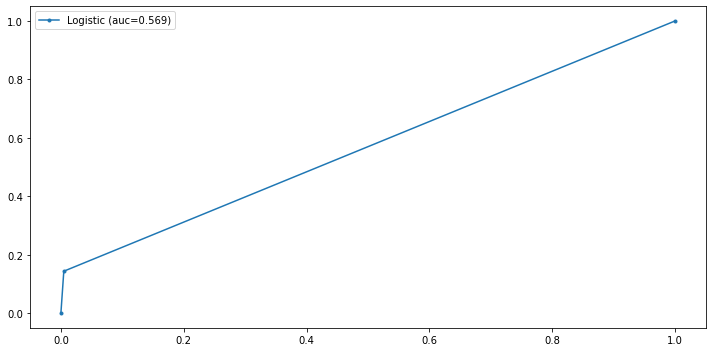

In [19]:
#in-sample roc

from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_train,y_pred3)
auc_logistic =  auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(10,5))
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc=%0.3f)' % auc_logistic)
plt.legend()
plt.tight_layout()

1312 6 41 5
0.0344574780058651


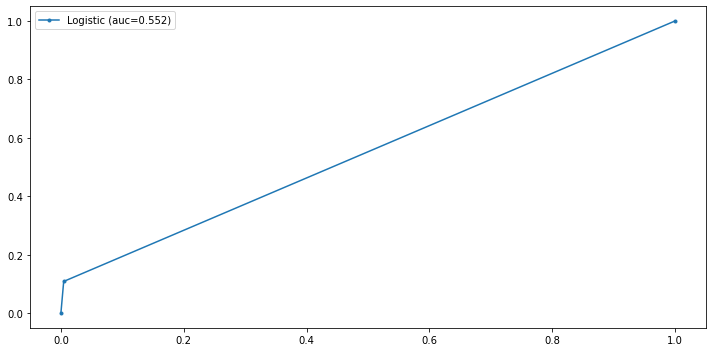

In [20]:
#out-of-sample roc

y_pred4 = bank_best_model_2.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred4) 
TN, FP, FN, TP = cm1.ravel()
print(TN, FP, FN, TP)
print((FP+FN)/(TN+FP+FN+TP))

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,y_pred4)
auc_logistic =  auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(10,5))
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc=%0.3f)' % auc_logistic)
plt.legend()
plt.tight_layout()

Based on the confusion matrix, we can know that the accuracy of this model is really high in both in-sample and out-of-sample, reaching over 96%. However, this may because most of the firms didn't bankrupt and the model tends to predict the firm not bankrupt. We can see this problem from the recall rate, which is quite low in both in-sample and out-of-sample. Additionally, from the roc curve we can see that the auc is just around 0.5, and this indicates that the model doesn't perform well. In this case, because we want to predict whether firms are going to bankrupt so that we can improve our profit, we want higher recall rate. Therefore, although the model's accuracy is high, I don't think the model performs well. 

**b) (optional) Repeat your classification analysis from a) using a different
method than logistic regression.
(Hint: Keep in mind that depending on your choice of method you
might want to include hyper-parameter tuning into your prediction
pipeline.)
For reference, the data for this exercise is a subset of the following data set on
Kaggle: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction**

Do this in 3 c).

# 3 Using Supervised Learning in practical decisionmaking

**a) Use your model from exercise 2a to predict which firms in bank out1.csv will go bankrupt based on their financial variables. Assume you de- cide to grant a loan to all the firms that you predict will not go bankrupt. Based on which firms actually go bankrupt (according to bankrupt future), what will the total profit (earnings minus losses) be for your bank?**

In [21]:
df3 = pd.read_csv("bank_out1.csv")
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,workingcapitalequity,totalincometotalexpense,cashflowtosales,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.765684,0.002002,0.671597,0.117905,0.564676,0.000000,0.592411,0.032345,-0.019899,0
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,0.794982,-0.042059,0.671571,0.095175,0.554129,0.034389,0.595824,0.019734,0.036719,0
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,0.738303,-0.023511,0.655138,0.110933,0.609876,0.000000,0.601334,0.026791,0.024112,0
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.736942,0.054627,0.655023,0.117376,0.621289,0.026350,0.600982,0.026795,0.113422,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.737082,0.008221,0.674877,0.110908,0.566111,0.000000,0.651180,0.058724,-0.020979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.793096,0.002378,0.653069,0.140512,0.545117,0.006778,0.582704,0.013703,0.038629,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.763661,0.002257,0.726405,0.114906,0.566711,0.034633,0.601212,0.021666,0.058070,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,0.735401,-0.032996,0.671563,0.142482,0.591379,0.038854,0.605993,0.026806,0.054589,0
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.753278,0.002370,0.671572,0.079545,0.581564,0.000000,0.597375,-0.003164,0.026031,0


In [22]:
df3['predict'] = bank_best_model_2.predict(df3.drop('bankrupt_future',axis=1))
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,totalincometotalexpense,cashflowtosales,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future,predict
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.002002,0.671597,0.117905,0.564676,0.000000,0.592411,0.032345,-0.019899,0,0
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,-0.042059,0.671571,0.095175,0.554129,0.034389,0.595824,0.019734,0.036719,0,0
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,-0.023511,0.655138,0.110933,0.609876,0.000000,0.601334,0.026791,0.024112,0,0
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.054627,0.655023,0.117376,0.621289,0.026350,0.600982,0.026795,0.113422,0,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.008221,0.674877,0.110908,0.566111,0.000000,0.651180,0.058724,-0.020979,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.002378,0.653069,0.140512,0.545117,0.006778,0.582704,0.013703,0.038629,0,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.002257,0.726405,0.114906,0.566711,0.034633,0.601212,0.021666,0.058070,0,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,-0.032996,0.671563,0.142482,0.591379,0.038854,0.605993,0.026806,0.054589,0,0
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.002370,0.671572,0.079545,0.581564,0.000000,0.597375,-0.003164,0.026031,0,0


In [23]:
a = len(df3.loc[(df3['predict']==0)&(df3['bankrupt_future']==1)])
a

32

In [24]:
b = len(df3.loc[df3['predict']==0])
b

659

In [25]:
b*90000-a*2000000

-4690000

If I use elasticnet model: LogisticRegression(C=10, l1_ratio=0.9, max_iter=10000, penalty='elasticnet',solver='saga') to preidct bankrupt, the total profit will be -4690000, which indicates that we should improve our prediction model.

**b) Assume instead that you decide to give loans to all firms in bank out1.csv. Based on which firms actually go bankrupt (according to bankrupt future), what will the total profit (earnings minus losses) be for your bank? What if you instead decide to not give any loans?**

In [26]:
c = len(df3)
c

665

In [27]:
d = len(df3.loc[df3['bankrupt_future']==1])
d

36

In [28]:
c*90000-d*2000000

-12150000

**c) (optional) Conduct a new supervised learning analysis on bank1.csv to predict which firms go bankrupt. Use whatever alternative classifica- tion method you like (you may have already done this in Exercise 2b). Assume that you use this model to predict bankruptcy and decide who gets a loan. What are the total profits? How does it compare to your finding in a) and b)?**

In [30]:
df4 = pd.read_csv("bank1.csv")
df4

,bankrupt,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,...,operatingfundstoliability,workingcapitalequity,totalincometotalexpense,cashflowtosales,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability
0,1,0.424389,0.601457,0.808809,0.458143,0.147950,0.311664,0.022102,0.688979,0.363725,...,0.334015,0.721275,0.002022,0.671568,0.126550,0.520382,0,0.601453,0.026601,0.016469
1,1,0.538214,0.610235,0.809301,0.461867,0.182251,0.318137,0.022080,0.689702,0.376709,...,0.341106,0.731975,0.002226,0.671570,0.120916,0.567101,0,0.610236,0.264577,0.020794
2,1,0.499019,0.601364,0.808388,0.458521,0.177911,0.307102,0.022760,0.689470,0.368913,...,0.336732,0.742729,0.002060,0.671571,0.117922,0.538490,0,0.601449,0.026555,0.016474
3,1,0.451265,0.583541,0.808966,0.465705,0.154187,0.321674,0.022046,0.689110,0.384077,...,0.348716,0.729825,0.001831,0.671519,0.120761,0.604105,0,0.583538,0.026697,0.023982
4,1,0.538432,0.598784,0.809304,0.462746,0.167502,0.319163,0.022096,0.689697,0.379690,...,0.344639,0.732000,0.002224,0.671563,0.110933,0.578469,0,0.598781,0.024752,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.539468,0.604462,0.809331,0.463734,0.175045,0.320966,0.022374,0.689778,0.380155,...,0.346224,0.736716,0.002266,0.671570,0.112622,0.587178,0,0.604455,0.027064,0.029890
6815,0,0.538269,0.598308,0.809327,0.461978,0.181324,0.318278,0.022159,0.689734,0.377389,...,0.342166,0.734584,0.002288,0.671572,0.112329,0.569498,0,0.598306,0.027009,0.038284
6816,0,0.533744,0.610213,0.809317,0.472189,0.269521,0.324857,0.022068,0.689202,0.379392,...,0.358847,0.737432,0.002239,0.671564,0.110933,0.589341,0,0.610441,0.026791,0.097649
6817,0,0.559911,0.607850,0.809399,0.476123,0.213392,0.346573,0.022350,0.696113,0.401028,...,0.380251,0.736713,0.002395,0.671606,0.110957,0.678338,0,0.607846,0.026822,0.044009


**`knn with standardization`**

In [31]:
X2 = df4.drop('bankrupt',axis=1)
y2 = df4['bankrupt']


x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

pipe2 = Pipeline([('scl', StandardScaler()),
                ('class', KNeighborsClassifier())])

pipe2.fit(x_train, y_train)

#create a dictionary of all values we want to test for n_neighbors
param_grid2 = {"class__n_neighbors": np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_2 = GridSearchCV(pipe2, param_grid2, scoring='recall',n_jobs=-1, cv=5)

#fit model to data'
knn_2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('class', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'class__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [32]:
best_model3 = knn_2.best_estimator_
y_pred4 = best_model3.predict(x_test)

In [33]:
df3['predict(standard_knn)'] = best_model3.predict(df3.iloc[:,0:24])
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,cashflowtosales,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future,predict,predict(standard_knn)
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.671597,0.117905,0.564676,0.000000,0.592411,0.032345,-0.019899,0,0,0
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,0.671571,0.095175,0.554129,0.034389,0.595824,0.019734,0.036719,0,0,0
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,0.655138,0.110933,0.609876,0.000000,0.601334,0.026791,0.024112,0,0,0
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.655023,0.117376,0.621289,0.026350,0.600982,0.026795,0.113422,0,0,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.674877,0.110908,0.566111,0.000000,0.651180,0.058724,-0.020979,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.653069,0.140512,0.545117,0.006778,0.582704,0.013703,0.038629,0,0,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.726405,0.114906,0.566711,0.034633,0.601212,0.021666,0.058070,0,0,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,0.671563,0.142482,0.591379,0.038854,0.605993,0.026806,0.054589,0,0,0
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.671572,0.079545,0.581564,0.000000,0.597375,-0.003164,0.026031,0,0,0


In [34]:
best_model3

Pipeline(steps=[('scl', StandardScaler()),
                ('class', KNeighborsClassifier(n_neighbors=1))])

In [36]:
len(df3.loc[df3['predict(standard_knn)']==0])

644

In [37]:
len(df3.loc[(df3['predict(standard_knn)']==0)&(df3['bankrupt_future']==1)])

31

In [38]:
644*90000-31*2000000

-4040000

**`knn without standardization`**

In [39]:
knn3 = KNeighborsClassifier()
k_dict = {'n_neighbors' : list(range(1,100))}
model4 = GridSearchCV(knn3, k_dict,scoring='recall',n_jobs=-1, cv=5)
model_fit4 = model4.fit(x_train,y_train)

In [40]:
best_model4 = model_fit4.best_estimator_
y_pred5 = best_model4.predict(x_test)

In [41]:
best_model4

KNeighborsClassifier(n_neighbors=1)

In [42]:
df3['predict(knn)'] = best_model4.predict(df3.iloc[:,0:24])
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,equitytolongtermliability,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future,predict,predict(standard_knn),predict(knn)
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.117905,0.564676,0.000000,0.592411,0.032345,-0.019899,0,0,0,0
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,0.095175,0.554129,0.034389,0.595824,0.019734,0.036719,0,0,0,0
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,0.110933,0.609876,0.000000,0.601334,0.026791,0.024112,0,0,0,0
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.117376,0.621289,0.026350,0.600982,0.026795,0.113422,0,0,0,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.110908,0.566111,0.000000,0.651180,0.058724,-0.020979,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.140512,0.545117,0.006778,0.582704,0.013703,0.038629,0,0,0,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.114906,0.566711,0.034633,0.601212,0.021666,0.058070,0,0,0,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,0.142482,0.591379,0.038854,0.605993,0.026806,0.054589,0,0,0,0
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.079545,0.581564,0.000000,0.597375,-0.003164,0.026031,0,0,0,0


In [43]:
len(df3.loc[(df3['predict(knn)']==0)&(df3['bankrupt_future']==1)])

28

In [44]:
len(df3.loc[df3['predict(knn)']==0])

649

In [45]:
649*90000-28*2000000

2410000

**`standardization elasticnet`**

In [46]:
pipe3 = Pipeline([('scl', StandardScaler()),
                  ('linear',LogisticRegression())])
                  
#                 ('linear', ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
#                                             alphas=[0.5, 1, 10],
#                                             max_iter=10000,
#                                             cv = 5))])

pipe3.fit(x_train, y_train)


#elastic_log2 = LogisticRegression(penalty = 'elasticnet', max_iter=10000, solver = 'saga')



l1_ratio_c_dict4 = {'linear__penalty':['elasticnet'], 
                    'linear__l1_ratio' : [0.1,0.5,0.7,0.9,0.95,0.99,1], 
                    'linear__C':[1], #1 perform the best for predicting test data, but not in gridsearch.
                    'linear__max_iter':[10000],
                    'linear__solver':['saga']}

gridsearch4 = GridSearchCV(pipe3,l1_ratio_c_dict4,scoring='recall',n_jobs=-1, cv=5)
#scoring-classification!!!! change it !!!

model_fit6 = gridsearch4.fit(x_train,y_train) 
best_model5 = model_fit6.best_estimator_
best_model5

Pipeline(steps=[('scl', StandardScaler()),
                ('linear',
                 LogisticRegression(C=1, l1_ratio=0.99, max_iter=10000,
                                    penalty='elasticnet', solver='saga'))])

In [47]:
# linear = pipe3.get_params('linear')['linear']
# print (u'超参数：', linear.alpha_)
# print (u'L1 ratio：', linear.l1_ratio_)
# alpha=0.5, ratio = 0.1

In [48]:
df3['predict(standard elasticnet)'] = best_model5.predict(df3.iloc[:,0:24])
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,cfotoassets,liabilityassetsflag,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future,predict,predict(standard_knn),predict(knn),predict(standard elasticnet)
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.564676,0.000000,0.592411,0.032345,-0.019899,0,0,0,0,0
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,0.554129,0.034389,0.595824,0.019734,0.036719,0,0,0,0,0
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,0.609876,0.000000,0.601334,0.026791,0.024112,0,0,0,0,0
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.621289,0.026350,0.600982,0.026795,0.113422,0,0,0,0,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.566111,0.000000,0.651180,0.058724,-0.020979,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.545117,0.006778,0.582704,0.013703,0.038629,0,0,0,0,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.566711,0.034633,0.601212,0.021666,0.058070,0,0,0,0,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,0.591379,0.038854,0.605993,0.026806,0.054589,0,0,0,0,0
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.581564,0.000000,0.597375,-0.003164,0.026031,0,0,0,0,0


In [50]:
len(df3.loc[(df3['predict(standard elasticnet)']==0)&(df3['bankrupt_future']==1)])

29

In [51]:
len(df3.loc[df3['predict(standard elasticnet)']==0])

650

In [52]:
650*90000-2000000*29

500000

**`standardization Ridge`**

In [98]:
pipe4 = Pipeline([('scl', StandardScaler()),
                  ('linear',LogisticRegression(penalty = 'l2',
                                              C = 100,
                                              max_iter = 10000,
                                              solver = 'lbfgs'))])
                  
#                 ('linear', ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
#                                             alphas=[0.5, 1, 10],
#                                             max_iter=10000,
#                                             cv = 5))])

pipe4.fit(x_train, y_train)


#elastic_log2 = LogisticRegression(penalty = 'elasticnet', max_iter=10000, solver = 'saga')



# l1_ratio_c_dict5 = {'linear__penalty':['l2'], 
#                     'linear__C':[100], #100 performs the best in predicting test data , but not in gridsearch.
#                     'linear__max_iter':[10000],
#                     'linear__solver':['liblinear']}

# gridsearch5 = GridSearchCV(pipe4,l1_ratio_c_dict5,scoring='recall',n_jobs=-1, cv=5)

# model_fit7 = gridsearch5.fit(x_train,y_train) 
# best_model6 = model_fit7.best_estimator_
# best_model6

Pipeline(steps=[('scl', StandardScaler()),
                ('linear', LogisticRegression(C=100, max_iter=10000))])

In [99]:
df3['predict(standard elasticnet2)'] = pipe4.predict(df3.iloc[:,0:24])
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future,predict,predict(standard_knn),predict(knn),predict(standard elasticnet),predict(standard elasticnet2),predict(standard elasticnet3)
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.592411,0.032345,-0.019899,0,0,0,0,0,1,1
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,0.595824,0.019734,0.036719,0,0,0,0,0,1,1
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,0.601334,0.026791,0.024112,0,0,0,0,0,1,1
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.600982,0.026795,0.113422,0,0,0,0,0,0,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.651180,0.058724,-0.020979,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.582704,0.013703,0.038629,0,0,0,0,0,0,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.601212,0.021666,0.058070,0,0,0,0,0,0,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,0.605993,0.026806,0.054589,0,0,0,0,0,1,1
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.597375,-0.003164,0.026031,0,0,0,0,0,0,0


In [101]:
len(df3.loc[(df3['predict(standard elasticnet2)']==0)&(df3['bankrupt_future']==1)])

17

In [102]:
len(df3.loc[df3['predict(standard elasticnet2)']==0])

455

In [103]:
455*90000-2000000*17

6950000

**`standardization lasso`**

In [70]:
pipe5 = Pipeline([('scl', StandardScaler()),
                  ('linear',LogisticRegression(penalty = 'l1',
                                              C = 100,
                                              max_iter = 10000,
                                              solver = 'liblinear'))])
                  
#                 ('linear', ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
#                                             alphas=[0.5, 1, 10],
#                                             max_iter=10000,
#                                             cv = 5))])

pipe5.fit(x_train, y_train)


#elastic_log2 = LogisticRegression(penalty = 'elasticnet', max_iter=10000, solver = 'saga')



# l1_ratio_c_dict6 = {'linear__penalty':['l1'], 
#                     'linear__C':[1,10,100], # 100 performs the best for predicting bankrupt, but not in gridsearch
#                     'linear__max_iter':[10000],
#                     'linear__solver':['liblinear']}

# gridsearch6 = GridSearchCV(pipe5,l1_ratio_c_dict6,scoring='recall',n_jobs=-1, cv=5)

# model_fit8 = gridsearch6.fit(x_train,y_train) 
# best_model7 = model_fit8.best_estimator_
# best_model7

Pipeline(steps=[('scl', StandardScaler()),
                ('linear',
                 LogisticRegression(C=100, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])

In [71]:
df3['predict(standard elasticnet3)'] = pipe5.predict(df3.iloc[:,0:24])
df3

,roaabeforeinterestandaftertax,realizedsalesgrossmargin,aftertaxnetinterestrate,cashflowrate,netvaluepersharea,cashflowpershare,realizedsalesgrossprofitgrowthra,regularnetprofitgrowthrate,cashreinvestment,networthassets,...,grossprofittosales,degreeoffinancialleveragedfl,equitytoliability,bankrupt_future,predict,predict(standard_knn),predict(knn),predict(standard elasticnet),predict(standard elasticnet2),predict(standard elasticnet3)
0,0.484133,0.592413,0.801961,0.461418,0.171759,0.315081,0.009752,0.689587,0.383707,0.958223,...,0.592411,0.032345,-0.019899,0,0,0,0,0,1,1
1,0.582861,0.615341,0.809367,0.460357,0.189178,0.317537,0.022127,0.690557,0.366766,0.896817,...,0.595824,0.019734,0.036719,0,0,0,0,0,1,1
2,0.569276,0.556929,0.809405,0.391977,0.182607,0.332279,0.022164,0.709950,0.393502,0.849231,...,0.601334,0.026791,0.024112,0,0,0,0,0,1,1
3,0.573539,0.598465,0.809405,0.470572,0.179350,0.301534,0.022118,0.691388,0.383637,0.962217,...,0.600982,0.026795,0.113422,0,0,0,0,0,0,0
4,0.581062,0.621746,0.803746,0.472526,0.181324,0.323336,0.042408,0.689479,0.380146,0.896034,...,0.651180,0.058724,-0.020979,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.598920,0.603461,0.838677,0.427133,0.231503,0.304166,0.022216,0.613598,0.363679,0.814221,...,0.582704,0.013703,0.038629,0,0,0,0,0,0,0
661,0.537015,0.600419,0.820871,0.461621,0.190552,0.331006,0.022052,0.703511,0.376225,0.871052,...,0.601212,0.021666,0.058070,0,0,0,0,0,0,0
662,0.582316,0.591535,0.802145,0.463647,0.227508,0.322558,0.003818,0.689551,0.358022,0.884301,...,0.605993,0.026806,0.054589,0,0,0,0,0,1,1
663,0.559460,0.562095,0.822961,0.478706,0.217353,0.270775,0.012850,0.690816,0.382130,0.839997,...,0.597375,-0.003164,0.026031,0,0,0,0,0,0,0


In [73]:
len(df3.loc[(df3['predict(standard elasticnet3)']==0)&(df3['bankrupt_future']==1)])

17

In [74]:
len(df3.loc[df3['predict(standard elasticnet3)']==0])

445

In [75]:
445*90000-2000000*17

6050000

Because some models take very long time to run(when using gridsearch with many parameters), I just tried some models. It's interesting that the best results of the gridsearch don't have the best performance on predicting this dataset. After I tried several times, I choose the models that can gain highest profit but not the ones that are the best in gridsearch. Among the results above, when I use standardization Ridge model: LogisticRegression(penalty = 'l2', C = 100, max_iter = 10000, solver = 'lbfgs') model, I get the highest profit which is 6950000.

## 4 Predicting house prices

**a) Open calihouse.csv. For each of the variables except median house value, create a new variable containing the squared of the original variable. Also create interaction terms between each of the original variables (ex- cept median house value). Then conduct a supervised learning analy- sis that predicts median house prices from all the variables (features) you now have. Do this using LASSO. How many variables are kept in the final model?
(Hint: Check the sklearn PolynomialFeatures() function for how to create the squared variables and interaction terms.)**

In [104]:
df5 = pd.read_csv('calihouse.csv')
df5

,Unnamed: 0,median_house_value,longitude,latitude,housing_median_age,median_income,avg_rooms,avg_bedrooms,avg_persons_per_house,ocean_close,total_population
0,0,178500,-118.39,34.21,32,3.6845,4.326389,1.020833,3.509259,1,1516
1,1,381200,-118.37,33.82,32,4.5687,4.622332,0.996716,2.197044,1,1338
2,2,263200,-121.95,37.32,39,4.6304,5.038961,0.861472,2.679654,1,619
3,3,182800,-117.89,33.84,35,3.5521,4.825327,1.082969,3.529840,1,2425
4,4,229200,-118.29,34.05,31,2.0530,2.348333,1.043333,3.438333,1,4126
...,...,...,...,...,...,...,...,...,...,...,...
20428,20635,131300,-123.24,38.70,38,2.7171,8.295455,1.767045,3.232955,1,569
20429,20636,94600,-124.35,40.54,52,3.0147,6.740741,1.111111,2.985185,1,806
20430,20637,500001,-121.94,36.57,28,14.4113,11.634690,1.509225,2.099631,1,569
20431,20638,364000,-119.71,34.36,34,4.1842,7.020576,1.135803,2.584362,1,628


In [105]:
df5 = df5.drop(['Unnamed: 0'],axis=1)
df5

,median_house_value,longitude,latitude,housing_median_age,median_income,avg_rooms,avg_bedrooms,avg_persons_per_house,ocean_close,total_population
0,178500,-118.39,34.21,32,3.6845,4.326389,1.020833,3.509259,1,1516
1,381200,-118.37,33.82,32,4.5687,4.622332,0.996716,2.197044,1,1338
2,263200,-121.95,37.32,39,4.6304,5.038961,0.861472,2.679654,1,619
3,182800,-117.89,33.84,35,3.5521,4.825327,1.082969,3.529840,1,2425
4,229200,-118.29,34.05,31,2.0530,2.348333,1.043333,3.438333,1,4126
...,...,...,...,...,...,...,...,...,...,...
20428,131300,-123.24,38.70,38,2.7171,8.295455,1.767045,3.232955,1,569
20429,94600,-124.35,40.54,52,3.0147,6.740741,1.111111,2.985185,1,806
20430,500001,-121.94,36.57,28,14.4113,11.634690,1.509225,2.099631,1,569
20431,364000,-119.71,34.36,34,4.1842,7.020576,1.135803,2.584362,1,628


In [106]:
X = df5.drop("median_house_value", axis=1) 
poly = PolynomialFeatures(2)
poly_fit = poly.fit_transform(X)
poly_fit

array([[ 1.000000e+00, -1.183900e+02,  3.421000e+01, ...,  1.000000e+00,
         1.516000e+03,  2.298256e+06],
       [ 1.000000e+00, -1.183700e+02,  3.382000e+01, ...,  1.000000e+00,
         1.338000e+03,  1.790244e+06],
       [ 1.000000e+00, -1.219500e+02,  3.732000e+01, ...,  1.000000e+00,
         6.190000e+02,  3.831610e+05],
       ...,
       [ 1.000000e+00, -1.219400e+02,  3.657000e+01, ...,  1.000000e+00,
         5.690000e+02,  3.237610e+05],
       [ 1.000000e+00, -1.197100e+02,  3.436000e+01, ...,  1.000000e+00,
         6.280000e+02,  3.943840e+05],
       [ 1.000000e+00, -1.171100e+02,  3.275000e+01, ...,  1.000000e+00,
         1.329000e+03,  1.766241e+06]])

In [107]:
poly_df = pd.DataFrame(poly_fit)
poly_df = poly_df.drop(poly_df.iloc[:,0:11],axis=1)

In [108]:
poly_df

,11,12,13,14,15,16,17,18,19,20,...,45,46,47,48,49,50,51,52,53,54
0,-4050.1219,-3788.48,-436.207955,-512.201194,-120.856419,-415.461173,-118.39,-179479.24,1170.3241,1094.72,...,1.042100,3.582367,1.020833,1547.582828,12.314899,3.509259,5320.036644,1.0,1516.0,2298256.0
1,-4003.2734,-3787.84,-540.797019,-547.145439,-117.981261,-260.064098,-118.37,-158379.06,1143.7924,1082.24,...,0.993443,2.189829,0.996716,1333.605874,4.827002,2.197044,2939.644872,1.0,1338.0,1790244.0
2,-4551.1740,-4756.05,-564.677280,-614.501294,-105.056486,-326.783805,-121.95,-75487.05,1392.7824,1455.48,...,0.742134,2.308446,0.861472,533.251044,7.180546,2.679654,1658.705826,1.0,619.0,383161.0
3,-3989.3976,-4126.15,-418.757069,-568.857800,-127.671215,-416.132838,-117.89,-285883.25,1145.1456,1184.40,...,1.172822,3.822707,1.082969,2626.199825,12.459770,3.529840,8559.862000,1.0,2425.0,5880625.0
4,-4027.7745,-3666.99,-242.849370,-277.784311,-123.415861,-406.720411,-118.29,-488064.54,1159.4025,1055.55,...,1.088544,3.587326,1.043333,4304.791958,11.822134,3.438333,14186.561958,1.0,4126.0,17023876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-4769.3880,-4683.12,-334.855404,-1022.331874,-217.770626,-398.429374,-123.24,-70123.56,1497.6900,1470.60,...,3.122448,5.712777,1.767045,1005.448605,10.451998,3.232955,1839.551395,1.0,569.0,323761.0
20429,-5041.1490,-6466.20,-374.877945,-838.211143,-138.166653,-371.207755,-124.35,-100226.10,1643.4916,2108.08,...,1.234568,3.316872,1.111111,895.555466,8.911329,2.985185,2406.059110,1.0,806.0,649636.0
20430,-4459.3458,-3414.32,-1757.313922,-1418.734099,-184.034897,-256.029004,-121.94,-69383.86,1337.3649,1023.96,...,2.277760,3.168816,1.509225,858.749025,4.408450,2.099631,1194.690039,1.0,569.0,323761.0
20431,-4113.2356,-4070.14,-500.890582,-840.433153,-135.966977,-309.373975,-119.71,-75177.88,1180.6096,1168.24,...,1.290048,2.935326,1.135803,713.284284,6.678927,2.584362,1622.979336,1.0,628.0,394384.0


In [109]:
df_house = pd.concat([df5, poly_df], axis=1)

In [110]:
df_house

,median_house_value,longitude,latitude,housing_median_age,median_income,avg_rooms,avg_bedrooms,avg_persons_per_house,ocean_close,total_population,...,45,46,47,48,49,50,51,52,53,54
0,178500,-118.39,34.21,32,3.6845,4.326389,1.020833,3.509259,1,1516,...,1.042100,3.582367,1.020833,1547.582828,12.314899,3.509259,5320.036644,1.0,1516.0,2298256.0
1,381200,-118.37,33.82,32,4.5687,4.622332,0.996716,2.197044,1,1338,...,0.993443,2.189829,0.996716,1333.605874,4.827002,2.197044,2939.644872,1.0,1338.0,1790244.0
2,263200,-121.95,37.32,39,4.6304,5.038961,0.861472,2.679654,1,619,...,0.742134,2.308446,0.861472,533.251044,7.180546,2.679654,1658.705826,1.0,619.0,383161.0
3,182800,-117.89,33.84,35,3.5521,4.825327,1.082969,3.529840,1,2425,...,1.172822,3.822707,1.082969,2626.199825,12.459770,3.529840,8559.862000,1.0,2425.0,5880625.0
4,229200,-118.29,34.05,31,2.0530,2.348333,1.043333,3.438333,1,4126,...,1.088544,3.587326,1.043333,4304.791958,11.822134,3.438333,14186.561958,1.0,4126.0,17023876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,131300,-123.24,38.70,38,2.7171,8.295455,1.767045,3.232955,1,569,...,3.122448,5.712777,1.767045,1005.448605,10.451998,3.232955,1839.551395,1.0,569.0,323761.0
20429,94600,-124.35,40.54,52,3.0147,6.740741,1.111111,2.985185,1,806,...,1.234568,3.316872,1.111111,895.555466,8.911329,2.985185,2406.059110,1.0,806.0,649636.0
20430,500001,-121.94,36.57,28,14.4113,11.634690,1.509225,2.099631,1,569,...,2.277760,3.168816,1.509225,858.749025,4.408450,2.099631,1194.690039,1.0,569.0,323761.0
20431,364000,-119.71,34.36,34,4.1842,7.020576,1.135803,2.584362,1,628,...,1.290048,2.935326,1.135803,713.284284,6.678927,2.584362,1622.979336,1.0,628.0,394384.0


In [111]:
X3 = df_house.drop('median_house_value',axis=1)
y3 = df_house['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

**`use pipeline for lasso`**

In [113]:
pipe6 = Pipeline([('scl', StandardScaler()),
                  ('linear',LogisticRegression(penalty = 'l1',
                                              C = 1,
                                              max_iter = 10000,
                                              solver = 'liblinear'))])
                  
pipe6.fit(x_train, y_train)

# l1_ratio_c_dict7 = {'linear__penalty':['l1'], 
#                     'linear__C':[1], 
#                     'linear__max_iter':[10000],
#                     'linear__solver':['liblinear']}

# gridsearch7 = GridSearchCV(pipe6,l1_ratio_c_dict7,scoring='neg_mean_squared_error',n_jobs=-1, cv=5)

# model_fit9 = gridsearch7.fit(x_train,y_train) 
# best_model8 = model_fit9.best_estimator_
# best_model8

Pipeline(steps=[('scl', StandardScaler()),
                ('linear',
                 LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])

In [114]:
pre_y = pipe6.predict(x_test)

In [115]:
sklearn.metrics.mean_squared_error(y_test,pre_y,squared=False)

156457.51538988083

In [117]:
sklearn.metrics.r2_score(y_test,pre_y)

-0.751335713127498

**`just use lasso`**

In [133]:
lasso = Lasso(alpha=0.1,max_iter=100000)
lasso.fit(x_train, y_train)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32468274271045.71, tolerance: 21504066038.73905
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=100000)

In [136]:
len(lasso.coef_)

53

In [137]:
pre_y2 = lasso.predict(x_test)

In [138]:
sklearn.metrics.mean_squared_error(y_test,pre_y2,squared=False)

71786.12334009924

In [139]:
sklearn.metrics.r2_score(y_test,pre_y2)

0.631313235536126

**b) Open calihouse.csv. Conduct a supervised learning analysis that pre- dicts median house prices from the other variables (features). Do this using either Random Forest or Boosting. Compare the performance of this model to the one from a).
(Hint: Do not use the polynomials from before but the original dataset.)**

In [140]:
df6 = pd.read_csv('calihouse.csv')
df6 = df6.drop(['Unnamed: 0'],axis=1)
df6

,median_house_value,longitude,latitude,housing_median_age,median_income,avg_rooms,avg_bedrooms,avg_persons_per_house,ocean_close,total_population
0,178500,-118.39,34.21,32,3.6845,4.326389,1.020833,3.509259,1,1516
1,381200,-118.37,33.82,32,4.5687,4.622332,0.996716,2.197044,1,1338
2,263200,-121.95,37.32,39,4.6304,5.038961,0.861472,2.679654,1,619
3,182800,-117.89,33.84,35,3.5521,4.825327,1.082969,3.529840,1,2425
4,229200,-118.29,34.05,31,2.0530,2.348333,1.043333,3.438333,1,4126
...,...,...,...,...,...,...,...,...,...,...
20428,131300,-123.24,38.70,38,2.7171,8.295455,1.767045,3.232955,1,569
20429,94600,-124.35,40.54,52,3.0147,6.740741,1.111111,2.985185,1,806
20430,500001,-121.94,36.57,28,14.4113,11.634690,1.509225,2.099631,1,569
20431,364000,-119.71,34.36,34,4.1842,7.020576,1.135803,2.584362,1,628


In [179]:
X4 = df6.drop('median_house_value',axis=1)
y4 = df6['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [180]:
X4, y4 = make_regression(n_features=9,n_informative=2,random_state=0, shuffle=False)
randomforest = RandomForestRegressor(max_depth=10, random_state=0)
randomforest_model = randomforest.fit(x_train, y_train)
y_pred_random = randomforest_model.predict(x_test)

In [181]:
sklearn.metrics.mean_squared_error(y_test,y_pred_random,squared=False)

55731.820325454355

In [182]:
sklearn.metrics.r2_score(y_test,y_pred_random)

0.7777800722178206

In [183]:
# boosted tree, but it takes sooo long to run.
# from sklearn.ensemble import GradientBoostingClassifier
# boosted_tree = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, 
#                                           random_state=0).fit(x_train, y_train)

Based on the results above, we can see that the random forest model performs better than lasso on predicting the house prices in this case, as it has a lower RMSE and higher R square.